In [87]:
import numpy as np # linear algebra
import matplotlib
import matplotlib.pyplot as plt
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
from plotly import tools
import seaborn as sns
import os
import plotly.express as px

In [88]:
data=pd.read_csv('../data/mushrooms.csv') # we have inserted our data
data.shape

(8124, 23)

In [89]:
data.head(5) # usingg head will print desire number of row as in this we need 5.


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [90]:
values={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
data["cap-shape"]=data["cap-shape"].replace(values)
values2={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
data["cap-surface"]=data["cap-surface"].replace(values2)
values3={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["cap-color"]=data["cap-color"].replace(values3)
values4={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
data["odor"]=data["odor"].replace(values4)
values5={"a":"attached","f":"free"}
data["gill-attachment"]=data["gill-attachment"].replace(values5)
values6={"c":"close","w":"crowded"}
data["gill-spacing"]=data["gill-spacing"].replace(values6)
values7={"b":"broad","n":"narrow"}
data["gill-size"]=data["gill-size"].replace(values7)
values8={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["gill-color"]=data["gill-color"].replace(values8)
values9={"t":"tapering","e":"enlarging"}
data["stalk-shape"]=data["stalk-shape"].replace(values9)
values10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
data["stalk-root"]=data["stalk-root"].replace(values10)
values11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
data["stalk-surface-above-ring"]=data["stalk-surface-above-ring"].replace(values11)
data["stalk-surface-below-ring"]=data["stalk-surface-below-ring"].replace(values11)
values12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
data["stalk-color-above-ring"]=data["stalk-color-above-ring"].replace(values12)
data["stalk-color-below-ring"]=data["stalk-color-below-ring"].replace(values12)
veil_type={"p":"partial","u":"universal"} 
data["veil-type"]=data["veil-type"].replace(veil_type)
veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
data["veil-color"]=data["veil-color"].replace(veil_color)
ring_number= {"n":"none","o":"one","t":"two"}
data["ring-number"]=data["ring-number"].replace(ring_number)
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
data["ring-type"]=data["ring-type"].replace(ring_type)
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
data["spore-print-color"]=data["spore-print-color"].replace(spore_print_color)
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
data["population"]=data["population"].replace(population)
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
data["habitat"]=data["habitat"].replace(habitat)
bruises={"t":"bruises","f":"no"}
data["bruises"]=data["bruises"].replace(bruises)


In [91]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [92]:
edible=data[data["class"]=="e"]
poisonous=data[data["class"]=="p"]


In [93]:
edible=data[data["class"]=="e"]
poisonous=data[data["class"]=="p"]


In [94]:


values={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
data["cap-shape"]=data["cap-shape"].replace(values)
values2={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
data["cap-surface"]=data["cap-surface"].replace(values2)
values3={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["cap-color"]=data["cap-color"].replace(values3)
values4={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
data["odor"]=data["odor"].replace(values4)
values5={"a":"attached","f":"free"}
data["gill-attachment"]=data["gill-attachment"].replace(values5)
values6={"c":"close","w":"crowded"}
data["gill-spacing"]=data["gill-spacing"].replace(values6)
values7={"b":"broad","n":"narrow"}
data["gill-size"]=data["gill-size"].replace(values7)
values8={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["gill-color"]=data["gill-color"].replace(values8)
values9={"t":"tapering","e":"enlarging"}
data["stalk-shape"]=data["stalk-shape"].replace(values9)
values10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
data["stalk-root"]=data["stalk-root"].replace(values10)
values11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
data["stalk-surface-above-ring"]=data["stalk-surface-above-ring"].replace(values11)
data["stalk-surface-below-ring"]=data["stalk-surface-below-ring"].replace(values11)
values12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
data["stalk-color-above-ring"]=data["stalk-color-above-ring"].replace(values12)
data["stalk-color-below-ring"]=data["stalk-color-below-ring"].replace(values12)
veil_type={"p":"partial","u":"universal"} 
data["veil-type"]=data["veil-type"].replace(veil_type)
veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
data["veil-color"]=data["veil-color"].replace(veil_color)
ring_number= {"n":"none","o":"one","t":"two"}
data["ring-number"]=data["ring-number"].replace(ring_number)
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
data["ring-type"]=data["ring-type"].replace(ring_type)
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
data["spore-print-color"]=data["spore-print-color"].replace(spore_print_color)
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
data["population"]=data["population"].replace(population)
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
data["habitat"]=data["habitat"].replace(habitat)
bruises={"t":"bruises","f":"no"}
data["bruises"]=data["bruises"].replace(bruises)


In [95]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [96]:
edible=data[data["class"]=="e"]
poisonous=data[data["class"]=="p"]


In [97]:
stalk_shape_edible=pd.DataFrame(edible["stalk-shape"].value_counts())
stalk_shape_poisonous=pd.DataFrame(poisonous["stalk-shape"].value_counts())
stalk_root_edible=pd.DataFrame(edible["stalk-root"].value_counts())
stalk_root_poisonous=pd.DataFrame(poisonous["stalk-root"].value_counts())
stalk_surface_above_ring_edible=pd.DataFrame(edible["stalk-surface-above-ring"].value_counts())
stalk_surface_above_ring_poisonous=pd.DataFrame(poisonous["stalk-surface-above-ring"].value_counts())
stalk_surface_below_ring_edible=pd.DataFrame(edible["stalk-surface-below-ring"].value_counts())
stalk_surface_below_ring_poisonous=pd.DataFrame(poisonous["stalk-surface-below-ring"].value_counts())
stalk_color_above_ring_edible=pd.DataFrame(edible["stalk-color-above-ring"].value_counts())
stalk_color_above_ring_poisonous=pd.DataFrame(poisonous["stalk-color-above-ring"].value_counts())
stalk_color_below_ring_edible=pd.DataFrame(edible["stalk-color-below-ring"].value_counts())
stalk_color_below_ring_poisonous=pd.DataFrame(poisonous["stalk-color-below-ring"].value_counts())



In [98]:
value1=stalk_color_above_ring_edible["stalk-color-above-ring"].values
label1=stalk_color_above_ring_edible.index
value2=stalk_color_above_ring_poisonous["stalk-color-above-ring"].values
label2=stalk_color_above_ring_poisonous.index
value3=stalk_color_below_ring_edible["stalk-color-below-ring"].values
label3=stalk_color_below_ring_edible.index
value4=stalk_color_below_ring_poisonous["stalk-color-below-ring"].values
label4=stalk_color_below_ring_poisonous.index

trace1=go.Bar(
      x = value1,
      y =label1 ,
      name='Edible- Stalk Color Above Ring',
    orientation = 'h',
    marker = dict(
        color = "darksalmon",
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3),
        opacity=0.8,
    ))
    
trace2=go.Bar(
     x = value2 ,
     y = label2,
      name='Poisonous-Stalk Color Above Ring',
    orientation = 'h',
    marker = dict(
        color = "plum",
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3), opacity=0.8))
    
trace3=go.Bar(
     x = value3,
     y = label3,
            name='Edible-Stalk Color Below Ring',
    orientation = 'h',
    marker = dict(
        color = "palegreen",
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3), opacity=0.8))
   
trace4=go.Bar(
      x =value4 ,
      y =label4 ,
             name='Poisonous- Stalk Color Below Ring',
    orientation = 'h',
    marker = dict(
        color = "sienna",
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3), opacity=0.8))
   

fig= tools.make_subplots(rows=1, cols=2,subplot_titles=('Stalk Color Counts Above Ring','Stalk Color Counts Below Rings'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)

fig['layout'].update(showlegend=True,height=600, width=800, barmode='stack',legend=dict(x=.58, y=-0.1,orientation="h",font=dict(size=11,color='#000')),
                     title='Stalk Colors Above and Below Ring')
iplot(fig)


/home/kanhaiya/anaconda3/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



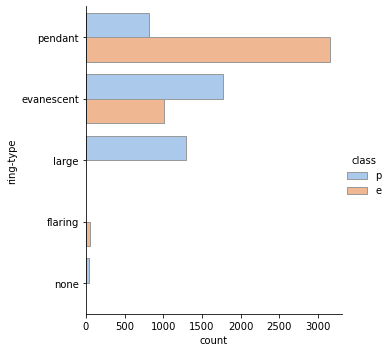

In [99]:
sns.catplot(y="ring-type", hue="class", kind="count",height=5,
            palette="pastel", edgecolor=".6",
            data=data)
plt.savefig("ring_type.pdf", dpi=400,  bbox_inches='tight')

In [100]:
fig = {
  "data": [
    {
      "values": [1744,1648,576,48,48,48,48,48],
      "labels": ['Brown','Black','White','Orange',"Purple","Chocolate","Yellow","Buff"],
      "domain": {"column": 0},
      "name": "Edible Mushrooms",
      "hoverinfo":"label+percent+name",
      "type": "pie",
         "hole": .4,
        'marker': {'colors': ['brown', 'black', 'white', 'orange',"purple","sienna","yellow","peru"],
                  "line":{"color":'#000000',"width":2}}
    },
    {
      "values": [1812,1584,224,224,72],
      "labels": ["White","Chocolate","Brown","Black","Green"],   
      "domain": {"column": 1},
      "name": "Poisonous Mushrooms",
      "hoverinfo":"label+percent+name",
         "hole": .4,
      "type": "pie",
        "marker": {"colors":["white","sienna","brown","black","green"],
                  "line":{"color":'#000000',"width":2}}

    }],
  "layout": {
      
        "title":"Edible and Poisonous Mushrooms Spore Print Color Percentages",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Edible",
                "x": 0.20,
                "y": 1.05
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Poisonous",
                "x": 0.85,
                "y": 1.05
            }
        ]
    }
}
#iplot(fig)
#go.Figure.write_image(fig,"file.jpeg")
#files.download("file.png")
#iplot(fig,image = 'svg', filename = 'foo.svg')
#fig.write_image("test.jpeg")
#iplot(fig)
#plotly.offline.plot({“data”: dataPanda,
#“layout”: layout1},
#image=‘jpeg’, image_filename=“test”, auto_open=False,output_type=‘file’
#fig.write_image("images/fig1.jpeg")
#fig.write_html("path/to/file.html")
#fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='jupyter-Edible and Poisonous Mushrooms Spore Print Color Percentages')
fig.write_image("fig1.png")

AttributeError: 'dict' object has no attribute 'write_image'